# Tabular Data Explanation Benchmarking: Multiple Explainer Comparison

This notebook demonstrates how to use the benchmark utility to benchmark the performance of various explainers for tabular data. In this demo, we showcase explanation performance across permutation, tree, and exact explainers. The metrics used to evaluate are "keep positive" and "keep negative". The masker used is Independent Masker but can also generalize to other tabular maskers. 

In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
import shap.benchmark as benchmark
from sklearn.model_selection import train_test_split

### Define Metrics (Sort Order and Perturbation Method)

In [2]:
# define metrics 
# sort order: positive, negative, absolute 
# perturbation: keep, remove
metrics = {'sort_order': ['positive', 'negative'], 'perturbation': ['keep']}

### Load Data

In [3]:
# create trained model for prediction function 
untrained_model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = untrained_model.fit(X_train, y_train)

### Define Explainer Masker

In [4]:
# use Independent masker as default
explainer_masker = shap.maskers.Independent(X)

### Create Explainer Objects

In [5]:
permutation_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='permutation')
tree_explainer = shap.Explainer(model, explainer_masker, algorithm='tree')
exact_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='exact')

### Define Benchmark Masker 

In [6]:
# used to mask input features 
# can be different from explainer masker 
benchmark_masker = shap.maskers.Independent(X)

### Define Score Function 

In [7]:
# score function must take in input (masked) and index (for the use of multi-output)
f = lambda x, index=None: model.predict(x)

### Benchmark Different Explainers

In [9]:
# create benchmarks for each explainer 
benchmarks = dict()
benchmarks['permutation'] = benchmark.framework.get_benchmark(f, X_train, y_train, permutation_explainer, benchmark_masker, metrics)
benchmarks['tree'] = benchmark.framework.get_benchmark(f, X_train, y_train, tree_explainer, benchmark_masker, metrics)
benchmarks['exact'] = benchmark.framework.get_benchmark(f, X_train, y_train, exact_explainer, benchmark_masker, metrics)

Permutation explainer: 355it [00:13, 25.86it/s]                         
Permutation explainer: 355it [00:13, 26.33it/s]                         
Exact explainer: 355it [05:54,  1.00it/s]
Exact explainer: 355it [20:03,  3.39s/it]


### Plot Model Output Trends for Individual Metric

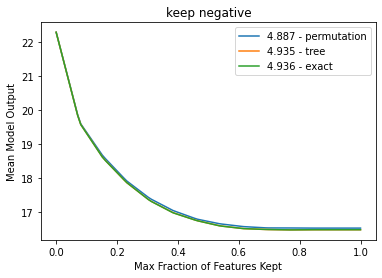

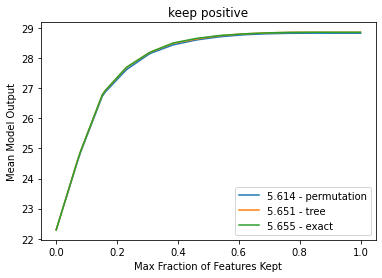

In [12]:
# trend of individual explainer with respect to specific metrics 
benchmark.framework.trend_plot(benchmarks)

### Compare Between Explainers

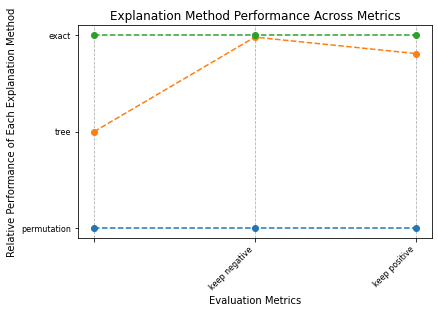

In [13]:
# compare explainer performance across different metrics 
# normalized between 0 and 1 for comparison 
benchmark.framework.compare_plot(benchmarks)